# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [127]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import statsmodels.api as sm

In [138]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [129]:
X = df['sqft_living'].values[:, np.newaxis]
y = df['price']
features = ['sqft_living']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)
    
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict y
y_test_pred = model.predict(X_test)

# print the intercept and coefficients
print('Intercept:', model.intercept_)
print(pd.Series(model.coef_, features))

# Print MSE, RMSE, and R^2
print('\nMean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R^2:', r2_score(y_test, y_test_pred))

Intercept: -41999.18603993766
sqft_living    279.554779
dtype: float64

Mean Squared Error: 76484977061.77612
Root Mean Squared Error: 276559.1746114674
R^2: 0.49406905389089006


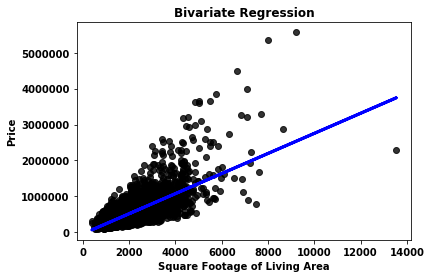

In [130]:
# Plot results
plt.scatter(X_test, y_test, color='black', alpha=0.8)
plt.plot(X_test, y_test_pred, color='blue', linewidth=3)
plt.title('Bivariate Regression')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [142]:
features = ['sqft_living', 'grade']
X2 = df.loc[:, ['sqft_living', 'grade']].values
y2 = df.loc[:, ['price']].values

# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.80, test_size=0.20, random_state=42)
    
# Initialize the model
model2 = LinearRegression()

# Fit the model
model2.fit(X_train, y_train)

# Predict y
y_test_pred2 = model2.predict(X_test)
df['prediction'] = pd.Series(y_test_pred2)

# print the intercept and coefficients
print('Intercept:', model2.intercept_)
print(pd.Series(model2.coef_, features))

# Print MSE, RMSE, and R^2
print('\nMean Squared Error:', mean_squared_error(y_test2, y_test_pred2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, y_test_pred2)))
print('R^2:', r2_score(y_test, y_test_pred2))

Intercept: -582887.8020468573
sqft_living      185.103939
grade          96261.372245
dtype: float64

Mean Squared Error: 69834518251.59691
Root Mean Squared Error: 264262.2149524917
R^2: 0.5380603453464137


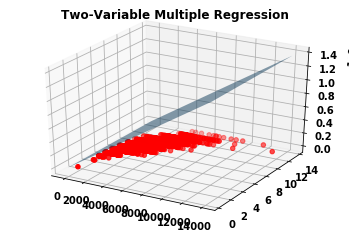

In [146]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

beta_i = model2.coef_
beta_0 = model2.intercept_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['grade'], df['price'],c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i*xx + beta_i*yy + beta_0

# Plot Plane
plt3d = plt.gca(projection='3d')
#plt3d.plot_surface(xx, yy, zz,alpha=0.7)

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Two-Variable Multiple Regression")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [27]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [59]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
               'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
               'sqft_living15', 'sqft_lot15']
X = df[features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)
    
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict y
y_test_pred = model.predict(X_test)
df['prediction'] = pd.Series(y_test_pred)

# print the intercept and coefficients
print('Intercept:', model.intercept_)
print(pd.Series(model.coef_, features))

# Print MSE, RMSE, and R^2
print('\nMean Squared Error:', mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R^2:', r2_score(y_test, y_test_pred))

Intercept: 6643873.52789695
bedrooms         -34335.418739
bathrooms         44564.528881
sqft_living         109.015817
sqft_lot              0.088847
floors             7003.129520
waterfront       562413.070005
view              53641.107022
condition         24526.710105
grade             94567.891697
sqft_above           70.022741
sqft_basement        38.993076
yr_built          -2680.768897
yr_renovated         20.415633
zipcode            -552.253038
lat              595968.122144
long            -194585.724048
sqft_living15        21.214331
sqft_lot15           -0.325832
dtype: float64

Mean Squared Error: 45173046132.78671
Root Mean Squared Error: 212539.51663816947
R^2: 0.701190444887864


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
